<a href="https://colab.research.google.com/github/saaranshM/tfpractice/blob/main/Week_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horse V/s Humans

In [1]:
# fetching the dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-10-26 03:43:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   172MB/s    in 0.8s    

2020-10-26 03:43:49 (172 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [6]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [7]:
# setup directories for each class

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [8]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse04-9.png', 'horse19-9.png', 'horse11-4.png', 'horse28-1.png', 'horse06-9.png', 'horse14-6.png', 'horse09-1.png', 'horse44-7.png', 'horse44-8.png', 'horse45-6.png']
['human14-04.png', 'human07-25.png', 'human16-24.png', 'human15-02.png', 'human15-29.png', 'human16-02.png', 'human17-11.png', 'human15-06.png', 'human07-30.png', 'human09-21.png']


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0


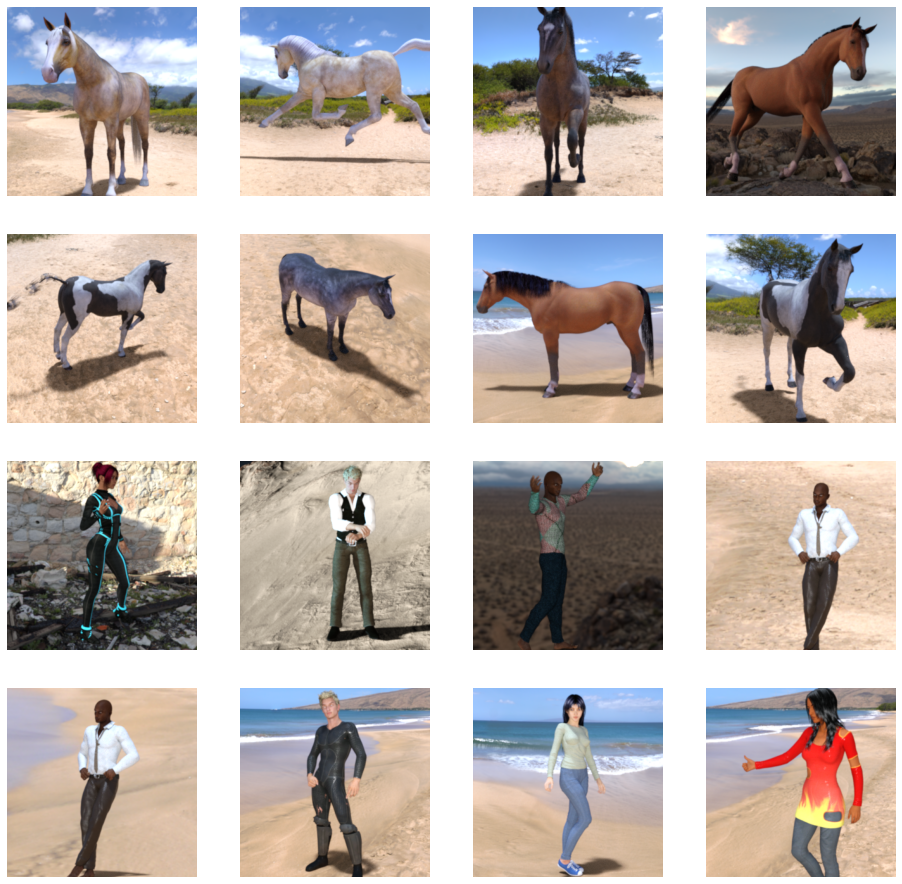

In [15]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# designing the model

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = (300,300,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)       

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)

train_datagenerator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300,300),
    batch_size = 128,
    class_mode = 'binary',
)

Found 1027 images belonging to 2 classes.


In [25]:
history = model.fit(
    train_datagenerator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 4s 528ms/step - loss: 1.1774 - accuracy: 0.6819
Epoch 2/15
8/8 [==============================] - 6s 691ms/step - loss: 0.3952 - accuracy: 0.8330
Epoch 3/15
8/8 [==============================] - 5s 608ms/step - loss: 0.2455 - accuracy: 0.9055
Epoch 4/15
8/8 [==============================] - 5s 611ms/step - loss: 0.4826 - accuracy: 0.8154
Epoch 5/15
8/8 [==============================] - 5s 616ms/step - loss: 0.2476 - accuracy: 0.8910
Epoch 6/15
8/8 [==============================] - 5s 612ms/step - loss: 0.2555 - accuracy: 0.8765
Epoch 7/15
8/8 [==============================] - 6s 691ms/step - loss: 0.0772 - accuracy: 0.9755
Epoch 8/15
8/8 [==============================] - 6s 697ms/step - loss: 0.3537 - accuracy: 0.8888
Epoch 9/15
8/8 [==============================] - 5s 616ms/step - loss: 0.4405 - accuracy: 0.8843
Epoch 10/15
8/8 [==============================] - 5s 614ms/step - loss: 0.1845 - accuracy: 0.9266
Epoch 11/15
8/8 [==

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  print(x)
  x = np.expand_dims(x, axis = 0)
  print(x.shape)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')

Saving download.jpg to download (3).jpg
[[[100. 111.  97.]
  [140. 151. 137.]
  [129. 139. 128.]
  ...
  [154. 165. 148.]
  [156. 167. 150.]
  [158. 169. 152.]]

 [[100. 111.  97.]
  [140. 151. 137.]
  [129. 139. 128.]
  ...
  [154. 165. 148.]
  [156. 167. 150.]
  [158. 169. 152.]]

 [[ 95. 106.  92.]
  [137. 148. 134.]
  [152. 162. 151.]
  ...
  [152. 163. 146.]
  [153. 164. 147.]
  [155. 166. 149.]]

 ...

 [[107. 120. 129.]
  [121. 134. 143.]
  [108. 121. 130.]
  ...
  [149. 150. 118.]
  [143. 144. 112.]
  [137. 138. 106.]]

 [[ 90. 103. 112.]
  [113. 126. 135.]
  [109. 122. 131.]
  ...
  [146. 147. 113.]
  [140. 141. 107.]
  [133. 134. 100.]]

 [[ 90. 103. 112.]
  [113. 126. 135.]
  [109. 122. 131.]
  ...
  [146. 147. 113.]
  [140. 141. 107.]
  [133. 134. 100.]]]
(1, 300, 300, 3)
[0.]
download.jpg is a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


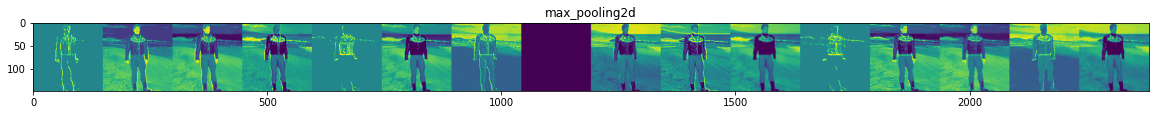

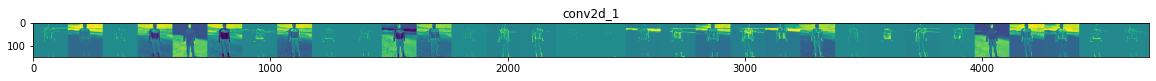

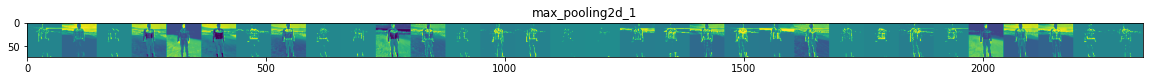

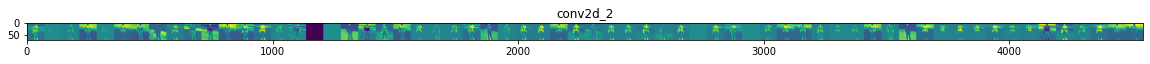

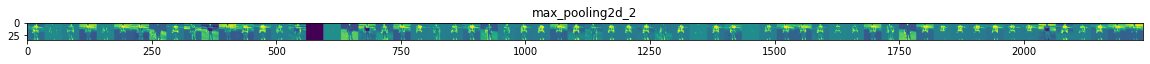

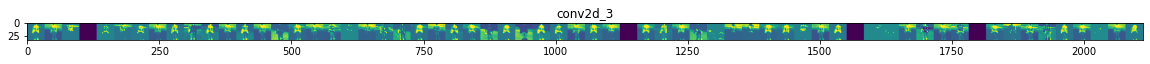

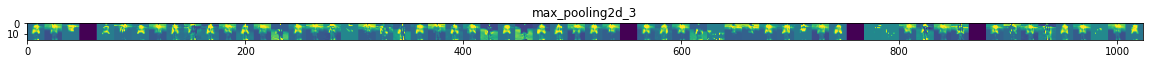

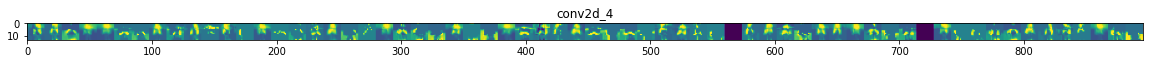

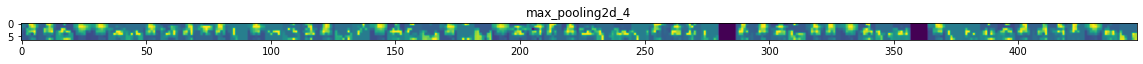

In [44]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(inputs=model.input, outputs = successive_outputs)

# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size = (300,300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')